## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
df['Mouse ID'].count()

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = df[df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicate_id


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
print("Duplicate Rows based on Mouse ID and Timepoint are:", duplicate_id, sep='\n')


Duplicate Rows based on Mouse ID and Timepoint are:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_df['Mouse ID'].count()

1888

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = cleaned_df[['Tumor Volume (mm3)', 'Drug Regimen']].groupby(['Drug Regimen']).mean()
mean.columns = ["Mean"]
median = cleaned_df[['Tumor Volume (mm3)', 'Drug Regimen']].groupby(['Drug Regimen']).median()
median.columns = ["Median"]
var = cleaned_df[['Tumor Volume (mm3)', 'Drug Regimen']].groupby(['Drug Regimen']).var()
var.columns = ["Variance"]
stdev = cleaned_df[['Tumor Volume (mm3)', 'Drug Regimen']].groupby(['Drug Regimen']).std()
stdev.columns = ["Standard Deviation"]
sem = cleaned_df[['Tumor Volume (mm3)', 'Drug Regimen']].groupby(['Drug Regimen']).sem()
sem.columns = ["SEM"]

mean_med = mean.merge(median, on='Drug Regimen')
mean_med_var = mean_med.merge(var, on='Drug Regimen')
mean_med_var_stdev = mean_med_var.merge(stdev, on='Drug Regimen')
summary_stats = mean_med_var_stdev.merge(sem, on='Drug Regimen')
summary_stats

# or I can just use concat to get the same result
# summary_stats_df = pd.concat([mean, median, var, stdev, sem], axis=1, join='inner')


#cleaned_df[['Tumor Volume (mm3)', 'Drug Regimen']].groupby(['Drug Regimen']).describe()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
#mean = cleaned_df[['Tumor Volume (mm3)', 'Drug Regimen']].groupby(['Drug Regimen']).mean().median().var().std().sem()

## Bar and Pie Charts

              Tumor Volume (mm3)
Drug Regimen                    
Capomulin                    230
Ceftamin                     178
Infubinol                    178
Ketapril                     188
Naftisol                     186
Placebo                      181
Propriva                     156
Ramicane                     228
Stelasyn                     181
Zoniferol                    182


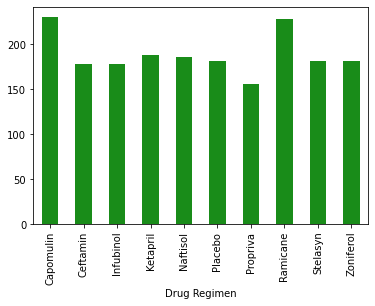

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total = cleaned_df.groupby(['Drug Regimen'])
total_measure = total['Tumor Volume (mm3)'].count()
total_measure_df = pd.DataFrame(total_measure)
total_measure_df
print(total_measure_df)
total_measure.plot.bar(y='Tumor Volume (mm3)', color='g', alpha=0.9, align="center")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

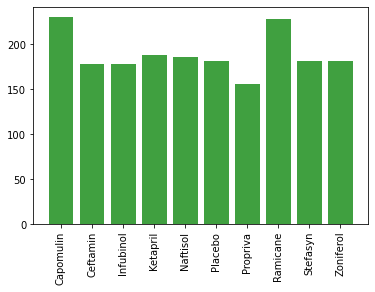

In [64]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
total = cleaned_df.groupby(['Drug Regimen'])
total_measure = total['Tumor Volume (mm3)'].count()
total_measure_df = pd.DataFrame(total_measure)
total_measure_df

x_axis = np.arange(len('total_measure_df'))
#plt.clf()
plt.bar(['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stefasyn','Zoniferol'], total_measure_df['Tumor Volume (mm3)'], color='g', alpha=0.75, align="center")
plt.xticks(rotation='vertical')

        Mouse ID
Sex             
Female       930
Male         958


Text(0, 0.5, 'Sex Chart')

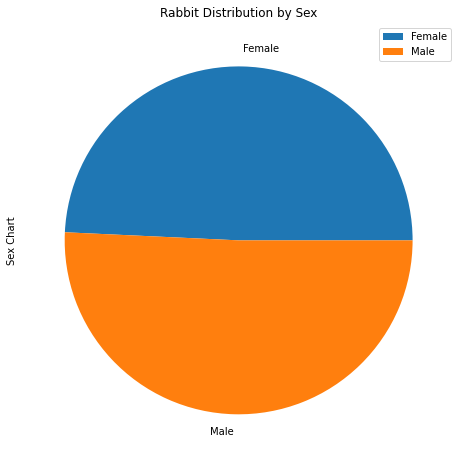

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Group the data by sex
sex_df = cleaned_df[['Mouse ID','Sex']].groupby(['Sex']).count()
print(sex_df)

sex_chart = sex_df.plot.pie(y='Mouse ID', title='Rabbit Distribution by Sex', figsize=(8, 8))
sex_chart.set_ylabel('Sex Chart')

        Mouse ID
Sex             
Female       930
Male         958


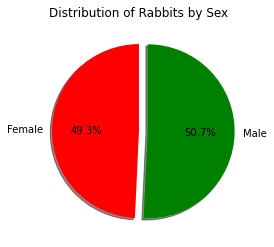

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Group the data by sex
sex_df = cleaned_df[['Mouse ID','Sex']].groupby(['Sex']).count()
print(sex_df)

# Generate the pie chart shoow the male-female distribution of the rabbits
labels = ['Female', 'Male']
explode = (0.0, 0.1)
colors = ['red','green']
plt.pie(sex_df['Mouse ID'], autopct='%1.1f%%', labels=labels, explode = explode, colors=colors, startangle=90, shadow=True)

plt.title('Distribution of Rabbits by Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [99]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_vol = cleaned_df[['Mouse ID', 'Timepoint']].groupby(['Mouse ID']).max()
final_vol

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_vol_df = final_vol.merge(cleaned_df, how='left', on=['Mouse ID','Timepoint'])
tumor_vol_df.head()



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [130]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
drug_treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_data = []
for x in drug_treatment:
    tumor_vol_df.loc[tumor_vol_df['Drug Regimen'] == x]
    tumor_vol_data.append([x, tumor_vol_df['Tumor Volume (mm3)']])
#print(tumor_vol_data)

Capomulin = tumor_vol_data
Capomulin

#quartiles = (Capomulin['Tumor Volume (mm3)']).quantile([0.25, 0.50, 0.75])
#lowerq = quartiles[0.25]
#upperq = quartiles[0.75]
#iqr = upperq - lowerq

#lower_bound = iqr - (1.5*iqr)
#upper_bound = iqr + (1.5*iqr)

#print(lowerq)
#print(upperq)
#print(lower_bound)
#print(upper_bound)



[['Capomulin',
  0      67.973419
  1      65.525743
  2      70.717621
  3      62.999356
  4      63.440686
           ...    
  244    48.710661
  245    30.638696
  246    62.754451
  247    65.741070
  248    73.867845
  Name: Tumor Volume (mm3), Length: 249, dtype: float64],
 ['Ramicane',
  0      67.973419
  1      65.525743
  2      70.717621
  3      62.999356
  4      63.440686
           ...    
  244    48.710661
  245    30.638696
  246    62.754451
  247    65.741070
  248    73.867845
  Name: Tumor Volume (mm3), Length: 249, dtype: float64],
 ['Infubinol',
  0      67.973419
  1      65.525743
  2      70.717621
  3      62.999356
  4      63.440686
           ...    
  244    48.710661
  245    30.638696
  246    62.754451
  247    65.741070
  248    73.867845
  Name: Tumor Volume (mm3), Length: 249, dtype: float64],
 ['Ceftamin',
  0      67.973419
  1      65.525743
  2      70.717621
  3      62.999356
  4      63.440686
           ...    
  244    48.710661
  245   

## Line and Scatter Plots

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


   Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10     s185    Capomulin  Female           3          17          0   
11     s185    Capomulin  Female           3          17          5   
12     s185    Capomulin  Female           3          17         10   
13     s185    Capomulin  Female           3          17         15   
14     s185    Capomulin  Female           3          17         20   
15     s185    Capomulin  Female           3          17         25   
16     s185    Capomulin  Female           3          17         30   
17     s185    Capomulin  Female           3          17         35   
18     s185    Capomulin  Female           3          17         40   
19     s185    Capomulin  Female           3          17         45   

    Tumor Volume (mm3)  Metastatic Sites  
10           45.000000                 0  
11           43.878496                 0  
12           37.614948                 0  
13           38.177232                 0  
14 

Text(0.5, 1.0, 'Tumor Volume vs. Time Point for a Mouse Treated Tith Capomulin')

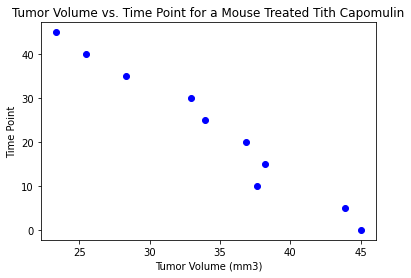

In [46]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin = cleaned_df.loc[(cleaned_df['Drug Regimen'] == 'Capomulin') & (cleaned_df['Mouse ID'] == 's185')]

print(capomulin)
plt.scatter(capomulin['Tumor Volume (mm3)'], capomulin['Timepoint'], marker='o', facecolors='blue')
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Time Point')
plt.title('Tumor Volume vs. Time Point for a Mouse Treated Tith Capomulin')

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
